In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#####To learn about the dataset used in this code, please go to this link:
####https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
#first we need to aggegate the files names to read them using cv2
#define paths :
base_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/"
covid_path = base_path + 'NORMAL/'
normal_path = base_path + 'PNEUMONIA/'
#use glob to grap images from path, with extensions jpg or jpeg
import glob
covid_files = glob.glob(covid_path + '*')
noncovid_files = glob.glob(normal_path + '*')
#let's visualize file variable contents
print("first 5 Covid files :", covid_files[:5])
print("Total count of Covid Files: ", len(covid_files))
print("first 5 Non-Covid files :", noncovid_files[:5])
print("Total count of Non-Covid Files: ", len(noncovid_files))

first 5 Covid files : ['/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0675-0001.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1169-0001.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0421-0001.jpeg']
Total count of Covid Files:  1341
first 5 Non-Covid files : ['/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1230_virus_2081.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg', '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person124_virus_238.jpeg', '/kaggle/input/chest-x

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

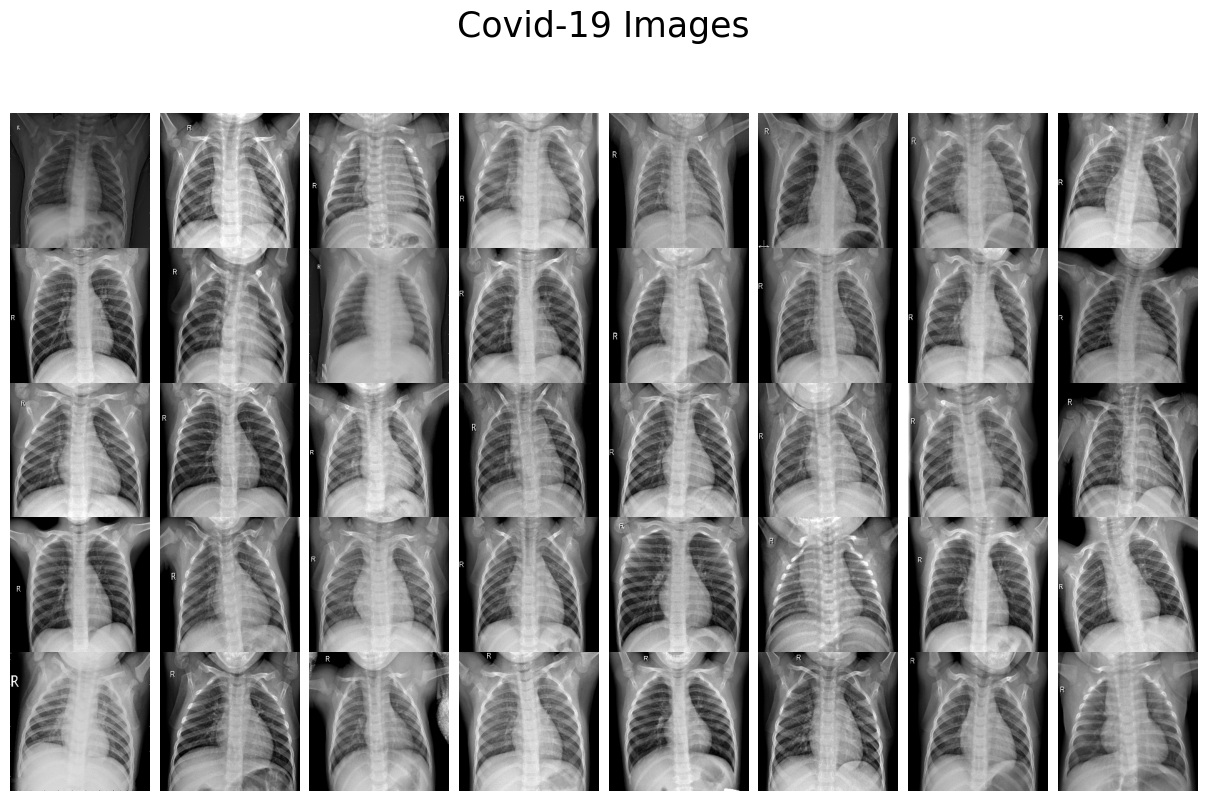

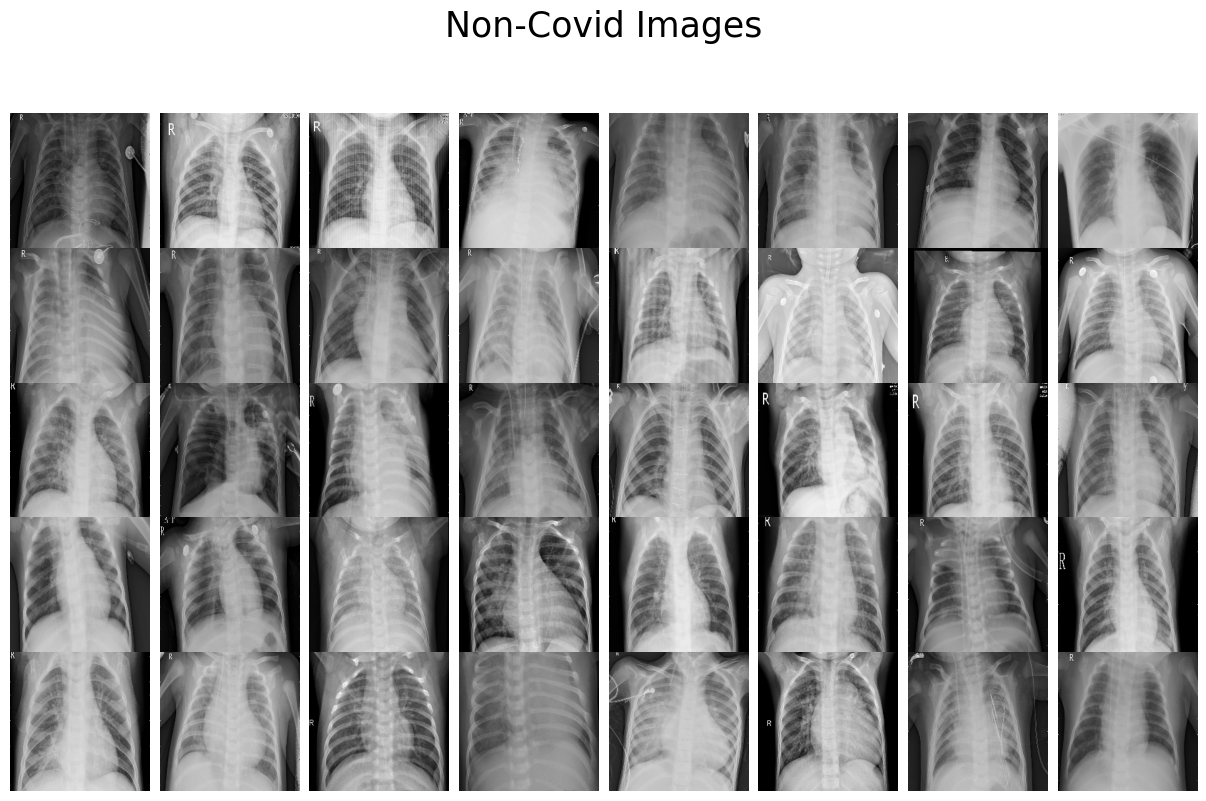

In [4]:
#Let's Fetch Images and class Labels from files:
covid_images = []
noncovid_images = []
covid_labels = []
noncovid_labels = []

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i])#read image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#arrange format
  image = cv2.resize(image,(224, 224 ))#append image
  covid_images.append(image)
  covid_labels.append('CT_Covid')#append class label
#non_covid

for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])#read image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#arrange format
  image = cv2.resize(image,(224, 224 ))#append image
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCovid')#append class label

#Visualize first 40 images from DataSet

def plot_images (images, title):
  nrows, ncols = 5, 8
  figsize = [12, 8]
  fig, ax = plt.subplots (nrows = nrows, ncols = ncols, figsize =figsize , facecolor = (1,1,1))
  for i , axi in enumerate(ax.flat):
    axi.imshow(images [i])
    axi.set_axis_off()
    plt.suptitle(title, fontsize = 25)
  plt.tight_layout(pad = 0.2, rect= [0,0,1, 0.9])
  plt.show()

plot_images(covid_images[:40], "Covid-19 Images")
plot_images(noncovid_images[:40], "Non-Covid Images")

In [5]:
#Normalization , convert the images from 0 to 1
covid_images = np.array(covid_images)/255
noncovid_images = np.array(noncovid_images)/255

In [6]:
from sklearn.model_selection import train_test_split
#for cvoid images
covid_train_images, covid_test_images, covid_train_labels, covid_test_labels = train_test_split(covid_images, covid_labels, test_size = 0.2, random_state = 42)


In [7]:
#free memory
del covid_images
del covid_labels

In [8]:
# #for non-covid images
noncovid_train_images, noncovid_test_images, noncovid_train_labels, noncovid_test_labels = train_test_split(noncovid_images, noncovid_labels, test_size = 0.2, random_state = 42)
del noncovid_images
del noncovid_labels

In [9]:
#split intro Training and testing sets

# #merge sets for both types of images:
X_train = np.concatenate((covid_train_images, noncovid_train_images), axis = 0)
y_train = np.concatenate((covid_train_labels, noncovid_train_labels), axis = 0)

X_test = np.concatenate((covid_test_images, noncovid_test_images), axis = 0)
y_test = np.concatenate((covid_test_labels, noncovid_test_labels), axis = 0)
# X = np.concatenate((covid_images, noncovid_images), axis = 0)
# del covid_images
# del noncovid_images
# y = np.concatenate((covid_labels, noncovid_labels), axis = 0)
#split intro Training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
#convert lables inot categories - either 0  or 1 for our model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)
y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

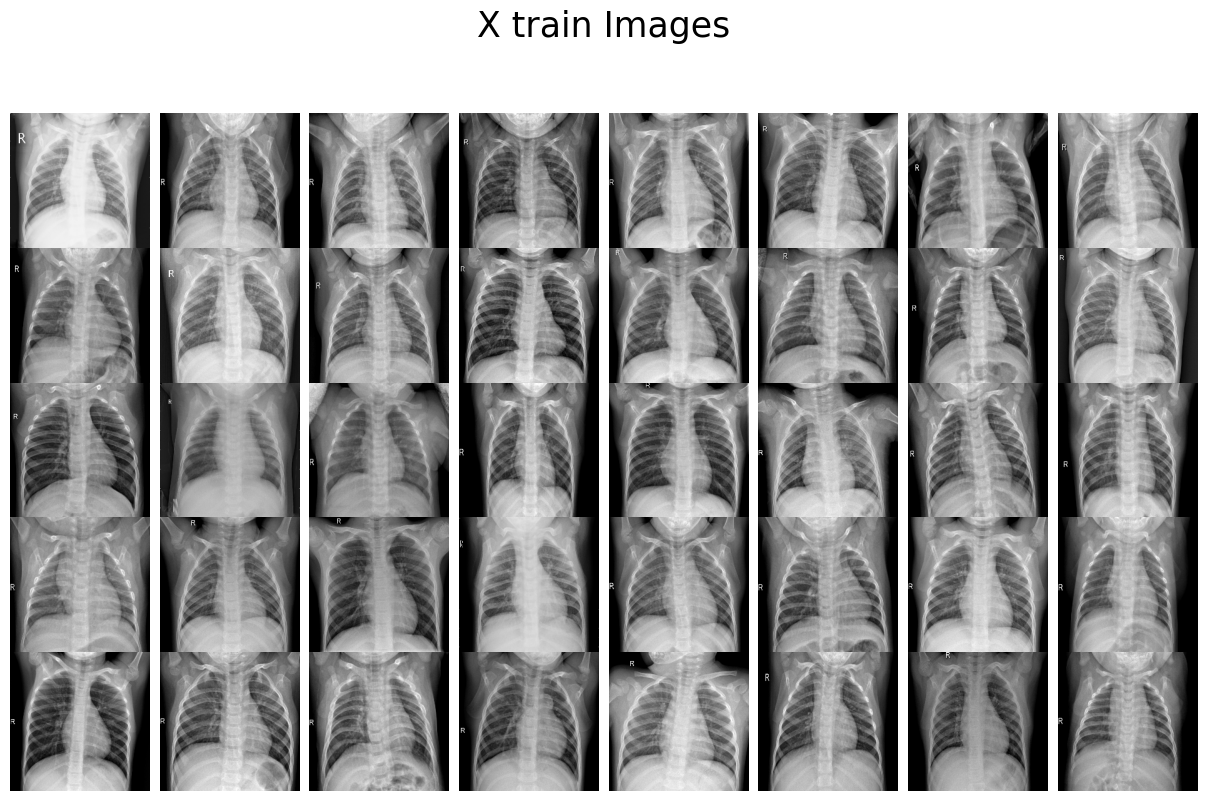

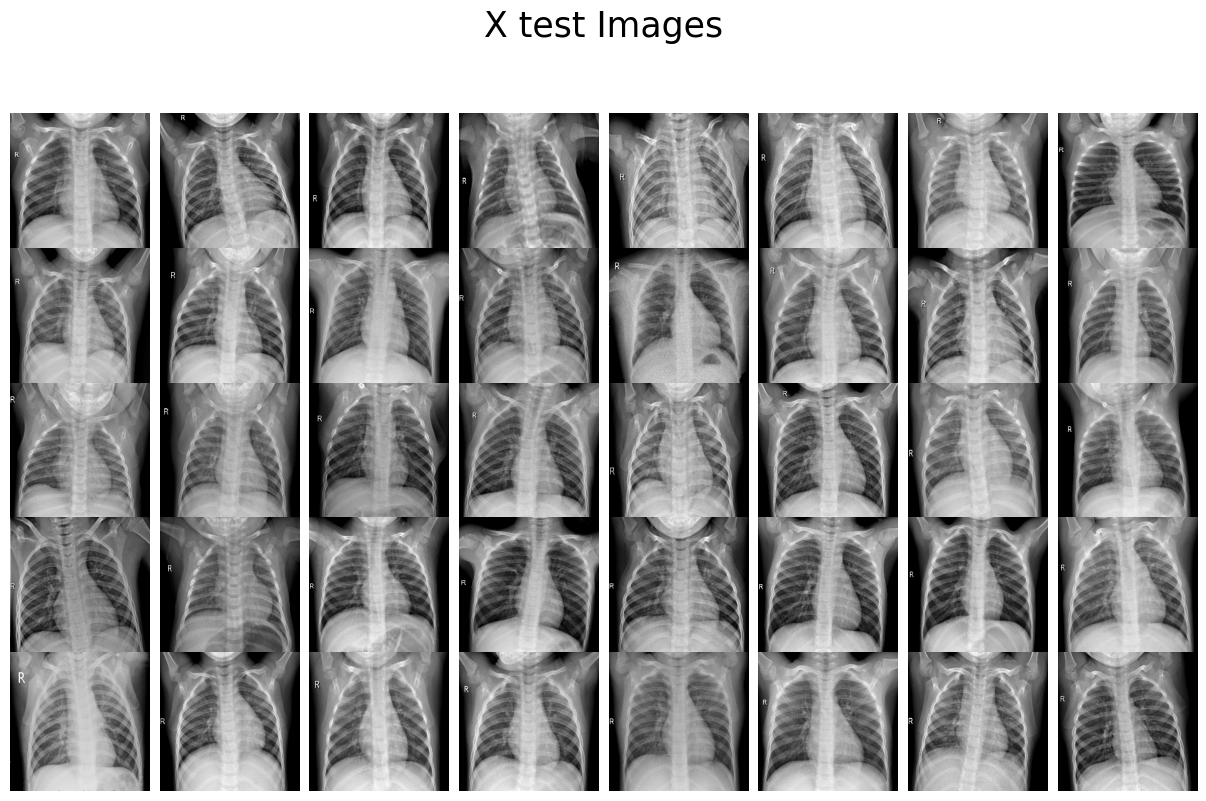

In [11]:
#visuaize a few images from Training and Test sets:
plot_images(X_train[:40], "X train Images")
plot_images(X_test[:40], "X test Images")

In [12]:
#building the model:
vggModel = tf.keras.applications.VGG16(
    weights = "imagenet",
    include_top =False,
    input_shape = (224,224,3)
)
#to combine the feature extraction layers with our custom classifiation layers
outputs = vggModel.output
outputs  = tf.keras.layers.Flatten(name = 'flatten')(outputs)
outputs = tf.keras.layers.Dense(4096 ,activation = 'relu', name = 'fc1')(outputs)
outputs = tf.keras.layers.Dense(1000, activation = 'relu',name = 'fc2')(outputs)
outputs = tf.keras.layers.Dense(2, activation ='softmax',name = 'predicted')(outputs)

#transfer learning


model = tf.keras.Model(inputs = vggModel.input , outputs = outputs)

for layer in vggModel.layers:
  layer.trainable = False

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy']
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 121,578,234 (463.78 MB)

 Trainable params: 106,863,546 (407.65 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
#Image Augmentation:
#train on images at different positons, angles, flips, etc
train_aug  = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    #zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    #shear_range = 0.15,
    horizontal_flip = True,
)

In [16]:
#training config:
epochs = 100
batch_size = 32

history = model.fit(
    train_aug.flow(X_train, y_train, batch_size = batch_size),
    validation_data = (X_test, y_test),
    steps_per_epoch=int(np.ceil(len(X_train) / batch_size)),
    validation_steps=int(np.ceil(len(X_test) / batch_size)),
    epochs = epochs
)

Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 48s 353ms/step - accuracy: 0.9478 - loss: 0.1487 - val_accuracy: 0.9579 - val_loss: 0.1083
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - accuracy: 0.9544 - loss: 0.1131 - val_accuracy: 0.9665 - val_loss: 0.0940
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - accuracy: 0.9684 - loss: 0.0923 - val_accuracy: 0.9646 - val_loss: 0.0891
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 74us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - accuracy: 0.9593 - loss: 0.0966 - val_accuracy: 0.9684 - val_loss: 0.0872
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - accuracy: 0.9616 - loss: 0.0

In [26]:
#saving Model and Weights:
save_path = '/kaggle/working/'

model.save(save_path+ trial+ 'vgg_model.h5')
model.save_weights(save_path + trial + 'vgg_.weights.h5')

In [29]:
#Load Saved model:
trial = '5'
#drive_path = '# Define the path to save the model and weights
save_path = '/kaggle/working/'
saved_model = tf.keras.models.load_model(save_path  + trial+ 'vgg_model.h5')
saved_model.load_weights(save_path + trial + 'vgg_.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [30]:
##Making Predictions
y_pred = saved_model.predict(X_test , batch_size = batch_size)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


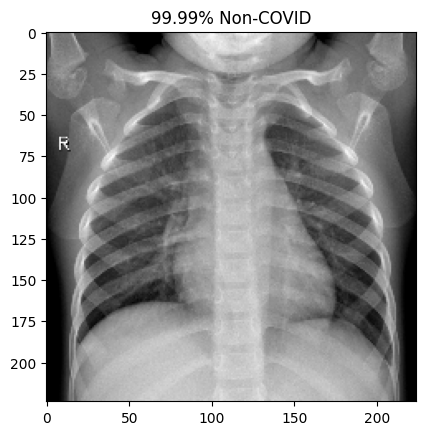

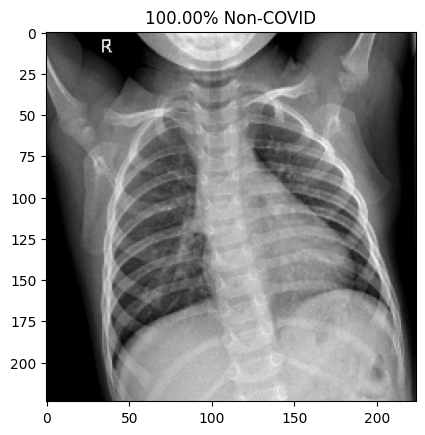

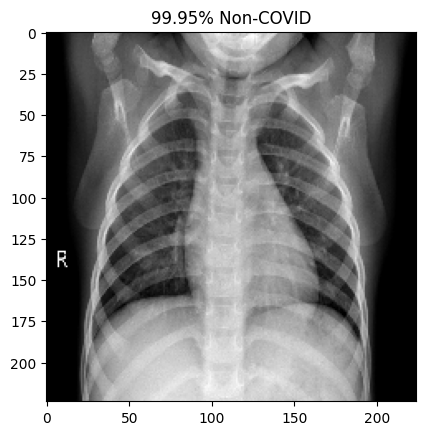

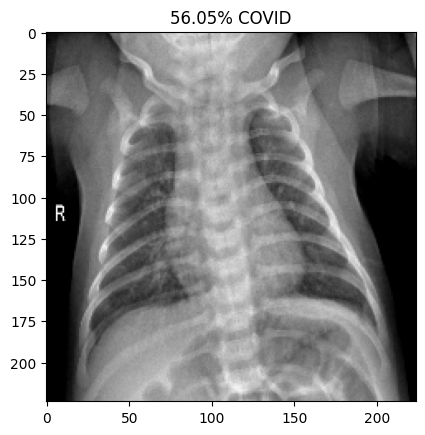

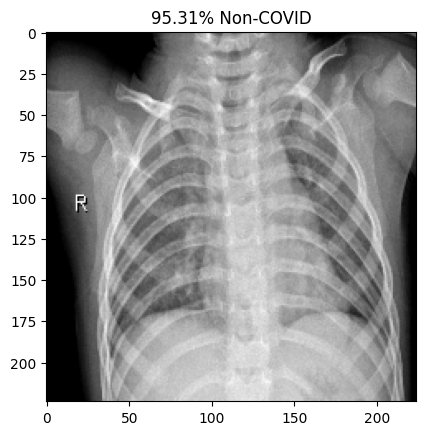

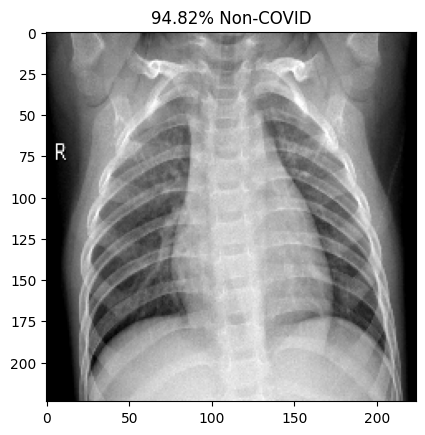

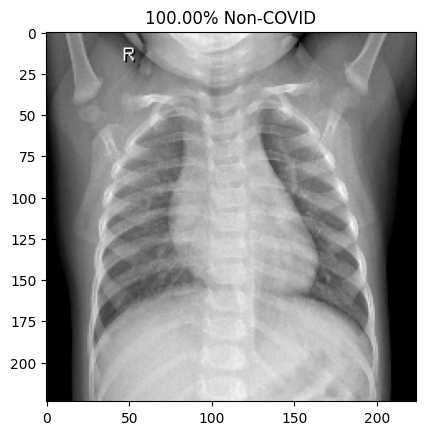

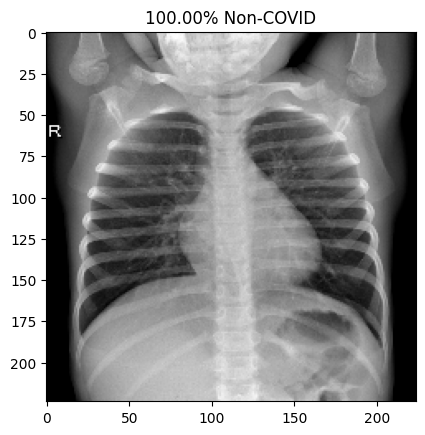

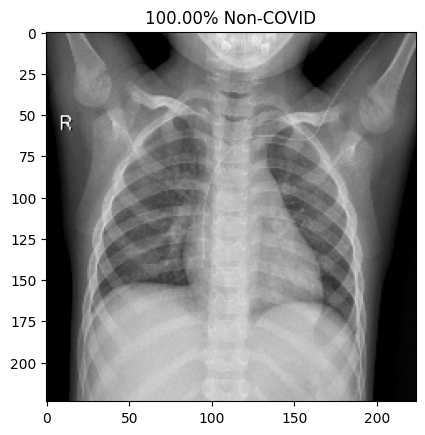

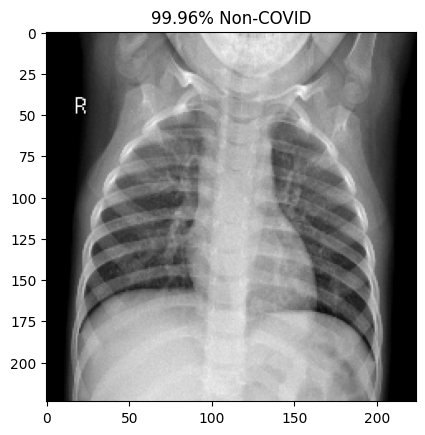

In [35]:
#visualizing First 10 predictions:

predication = y_pred[0:10]
for index ,  probability in enumerate(predication):
  if probability[1] > 0.5:
    plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
    plt.title('%.2f' % ((1-probability[1])*100) + '% Non-COVID')
  plt.imshow(X_test[index])
  plt.show()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy_score(y_test.argmax(axis = 1), y_pred.argmax(axis = 1))

0.9664750957854407

In [38]:
model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9540 - loss: 0.1092


[0.07809410244226456, 0.9664750695228577]

In [40]:
test_loss , test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: {}   Test Loss: {} '.format(test_acc,test_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9540 - loss: 0.1092
Test Accuracy: 0.9664750695228577   Test Loss: 0.07809410244226456 
